# Introduction:

 Given the reviews.csv dataset, we have to perform sentimental analysis.
 Task 1: Data Preprocessing on text (Column name : content)
 Task 2: Data Exploration ( Exploring different plots on text data and to come up with the wordcl
 
 oud)dels.

## Importing Libraries

In [115]:
!pip install wordcloud

!pip install keras

!pip install tensorflow

import pandas as pd # using it to load the csv file
import re
import nltk  # nltk for text preprocessing tasks
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## Loading Dataset

In [117]:
df = pd.read_csv('fake_job_postings.csv')

In [118]:
df.head() # displaying first 5 rows

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [120]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# 1. Data Preprocessing

# Lower Case :
Convert all text to lowercase to ensure uniformity.
".str.lower()" is the correct approach for converting all strings in a Pandas DataFrame column to lowercase.

In [123]:
df['description'] = df['description'].str.lower()

In [124]:
df['company_profile'] = df['company_profile'].str.lower()

## Remove Links :
Remove any URLs or hyperlinks present in the text data.

In [126]:
df['description'] = df['description'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')

In [127]:
df['company_profile'] = df['company_profile'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',' ')

## Remove next lines (\n): 
Remove newline characters to ensure that each review is treated as a single unit of text.

In [129]:
df['description'] = df['description'].str.replace('\n',' ')

In [130]:
df['company_profile'] = df['company_profile'].str.replace('\n',' ')

## Remove Words containing numbers:
Remove any words that contain numbers, as they might not carry much meaning in the context of text analysis.

In [132]:
df['description'] = df['description'].str.replace('\d+','') # \d stands for "any digit" and + stands for one or more

In [133]:
df['company_profile'] = df['company_profile'].str.replace('\d+','')

## Extra spaces:
Remove any extra spaces to ensure consistency in spacing between words.

In [135]:
df['description'] = df['description'].apply(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)

In [136]:
df['company_profile'] = df['company_profile'].apply(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)

The expression ' '.join(text.split()) is used to remove extra whitespace (spaces, tabs, etc.) from a string by splitting the string into words, then joining those words back together with a single space between them.

## Special Characters:
Remove any special characters like punctuation marks, which might not be relevant for analysis.

In [139]:
import re

def remove_specialchar(text):
    return re.sub(r'[^\w\s]','',text)

df['description'] = df['description'].apply(lambda x: remove_specialchar(x) if pd.notna(x) else x)
df['company_profile'] = df['company_profile'].apply(lambda x: remove_specialchar(x) if pd.notna(x) else x)

## Removal of stop words:
 Remove common stop words like 'and', 'the', 'is', etc., which do not carry much meaning on their own.
 stop_words is a Python set that contains common stopwords for the English language, which can be used later in the code for tasks such as text preprocessing or filtering out stopwords from text data to focus on the more meaningful words.

In [141]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [w for w in tokens if not w in stop_words]
        return ' '.join(tokens)
    else:
        return ''

df['description'] = df['description'].fillna('')
df['description'] = df['description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Stemming:
Reduce words to their root form by removing suffixes, using stemming algorithms like Porter or Snowball stemming.
Stemming is the process of removing suffixes from words to obtain their root forms, known as stems. It's a rule-based heuristic process that cuts off the end of words using predefined rules. Stemmers do not consider the context of the word, and they may produce non-realistic words or stems.
Stemming is generally faster and less computationally intensive compared to lemmatization. 

In [143]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the 'punkt' package

stemmer = PorterStemmer()

def stemming(text):
    if isinstance(text, str):  # Check if the text is a string
        tokens = word_tokenize(text)
        stemmed_tokens = [stemmer.stem(word) for word in tokens]
        return '.'.join(stemmed_tokens)
    else:
        return ''  # Return an empty string for missing values

df['description'] = df['description'].apply(stemming)
df['description'].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    food52.fastgrow.jame.beard.awardwin.onlin.food...
1    organis.focus.vibrant.awesomedo.passion.custom...
2    client.locat.houston.activ.seek.experienc.comm...
3    compani.esri.environment.system.research.insti...
4    job.titl.item.review.managerloc.fort.worth.tx....
Name: description, dtype: object

## Lemmatization:
Similar to stemming, but instead of just removing suffixes, lemmatization considers the context and converts words to their base or dictionary form.
Lemmatization is a more sophisticated process that involves reducing words to their base or dictionary form, known as lemmas. Unlike stemming, lemmatization considers the context of the word and applies linguistic rules to determine the lemma. Lemmatization typically requires a lexicon or a dictionary lookup to accurately determine the lemma.
Lemmatization produces real words, but it can be slower and more resource-intensive than stemming due to the need for dictionary lookups and linguistic analysis.

In [145]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

 WordNet is a lexical database for the English language, which includes words and their semantic relationships.

In [147]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['description'] = df['description'].apply(lemmatization)
df['description'].head()

0    food52.fastgrow.jame.beard.awardwin.onlin.food...
1    organis.focus.vibrant.awesomedo.passion.custom...
2    client.locat.houston.activ.seek.experienc.comm...
3    compani.esri.environment.system.research.insti...
4    job.titl.item.review.managerloc.fort.worth.tx....
Name: description, dtype: object

In [148]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the 'punkt' package
nltk.download('wordnet')  # Download the 'wordnet' package

lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    if isinstance(text, str):  # Check if the text is a string
        tokens = word_tokenize(text)
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return '.'.join(lemmatized_tokens)
    else:
        return ''  # Return an empty string for missing values

df['company_profile'] = df['company_profile'].apply(lemmatization)
df['company_profile'].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    were.food52.and.weve.created.a.groundbreaking....
1    90.second.the.world.cloud.video.production.ser...
2    valor.service.provides.workforce.solution.that...
3    our.passion.for.improving.quality.of.life.thro...
4    spotsource.solution.llc.is.a.global.human.capi...
Name: company_profile, dtype: object

# 2. EDA 

##  WordCloud

In [151]:
df['description'].isnull().sum()
df['company_profile'].isnull().sum()

0

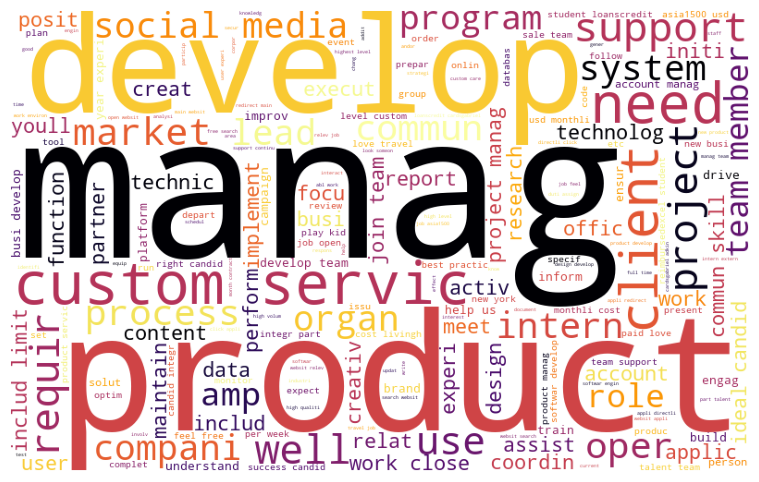

In [152]:
string = ' '.join(df['description'])  # Concatenate all text data into a single string
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white',colormap = 'inferno').generate(string)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

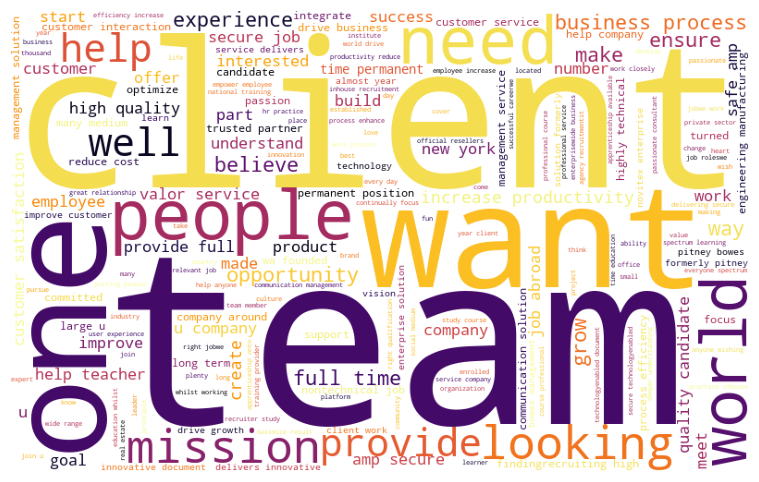

In [153]:
string2 = ' '.join(df['company_profile'])  # Concatenate all text data into a single string
# Generate word cloud
wordcloud2 = WordCloud(width = 800, height = 500, background_color = 'white',colormap = 'inferno').generate(string2)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

## Figure 1: Boxplot of Description Length vs Fraudulent Job Posts

What it represents: This boxplot shows the distribution of description lengths for fraudulent and non-fraudulent job posts.
Interpretation:
The x-axis represents the fraudulent status of the job post (0 = non-fraudulent, 1 = fraudulent).
The y-axis represents the length of the job description.
The boxplot shows the median, quartiles, and outliers of the description length distribution for each fraudulent status.
Insights:
The median description length for non-fraudulent job posts is shorter than that of fraudulent job posts. This could indicate that fraudulent job posts tend to have longer descriptions, possibly to make them appear more legitimate.
The interquartile range (IQR) for fraudulent job posts is larger than that of non-fraudulent job posts, indicating more variability in description length among fraudulent job posts.
There are some outliers in the fraudulent job post category with extremely long descriptions, which could be indicative of suspicious activity.
Impact:

This analysis suggests that description length could be a useful feature in identifying fraudulent job posts.
A longer description length may be a red flag for potential fraud, and further investigation may be warranted.

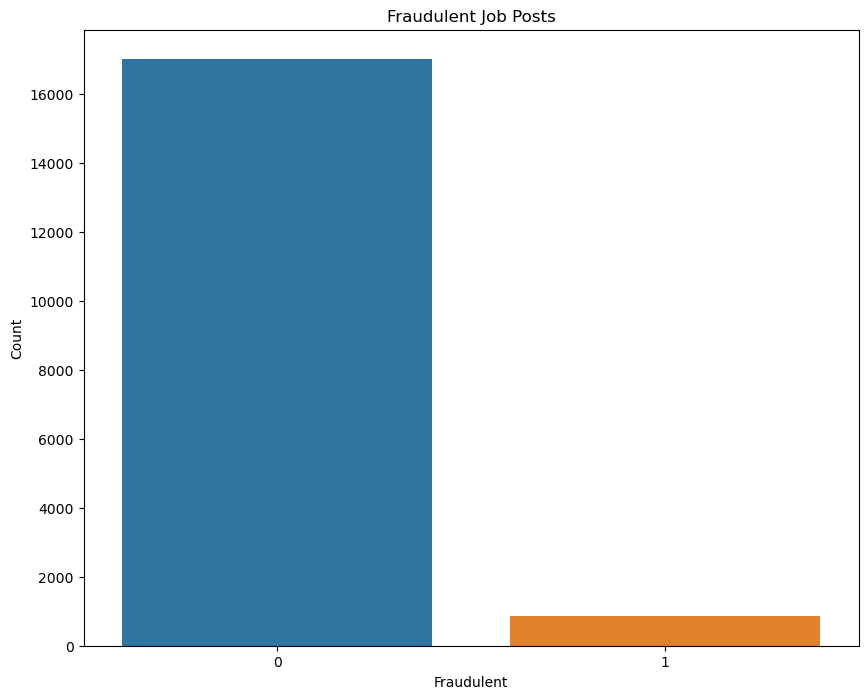

In [155]:
plt.figure(figsize=(10, 8))
sns.countplot(x='fraudulent', data=df)
plt.title('Fraudulent Job Posts')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

## Figure 2: Scatterplot of Telecommuting vs Company Logo

What it represents: This scatterplot shows the relationship between telecommuting options and the presence of a company log
o.
Interpretation:
The x-axis represents the telecommuting option (0 = no telecommuting, 1 = telecommuting allowed).
The y-axis represents the presence of a company logo (0 = no logo, 1 = logo present).
Each point on the scatterplot represents a jo
 post.
Insights:
There is a positive correlation between telecommuting options and the presence of a company logo. This suggests that companies that offer telecommuting options are more likely to have a company logo.
There are some job posts with no telecommuting options but with a company logo, which could indicate that these companies are more established or r
eputable.
Impact:

This analysis suggests that the presence of a company logo may be a useful feature in identifying legitimate job posts.
The correlation between telecommuting options and company logo presence could be used to inform fraud detection models.

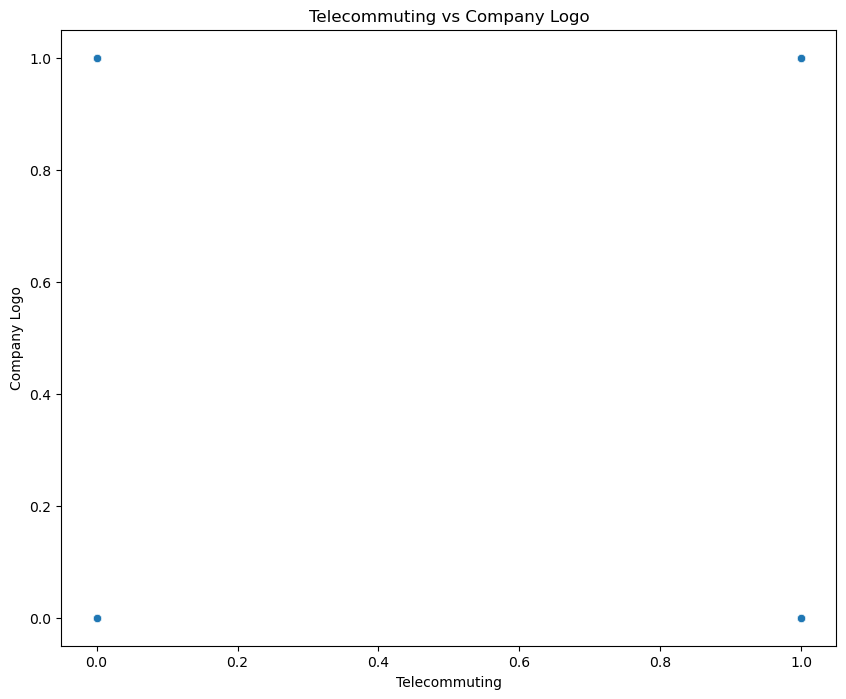

In [157]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='telecommuting', y='has_company_logo', data=df)
plt.title('Telecommuting vs Company Logo')
plt.xlabel('Telecommuting')
plt.ylabel('Company Logo')
plt.show()


## Figure 3: Barplot of Employment Type vs Fraudulent Job Posts

What it represents: This barplot shows the distribution of employment types for fraudulent and non-fraudulent job posts.
Interpretation:
The x-axis represents the employment type (e.g., full-time, part-time, contract, etc.).
The y-axis represents the count of fraudulent job posts for each employment type.
The bars are colored by fraudulent status (blue = non-fraudulent, red = fraudulent).
Insights:
Full-time employment types have the highest count of fraudulent job posts, followed by part-time and contract employment types.
There are some employment types (e.g., internship, volunteer) with no fraudulent job posts, which could indicate that these types are less susceptible to fraud.
Impact:

This analysis suggests that employment type could be a useful feature in identifying fraudulent job posts.
The distribution of fraudulent job posts across employment types could be used to inform fraud detection models and prioritize investigations.

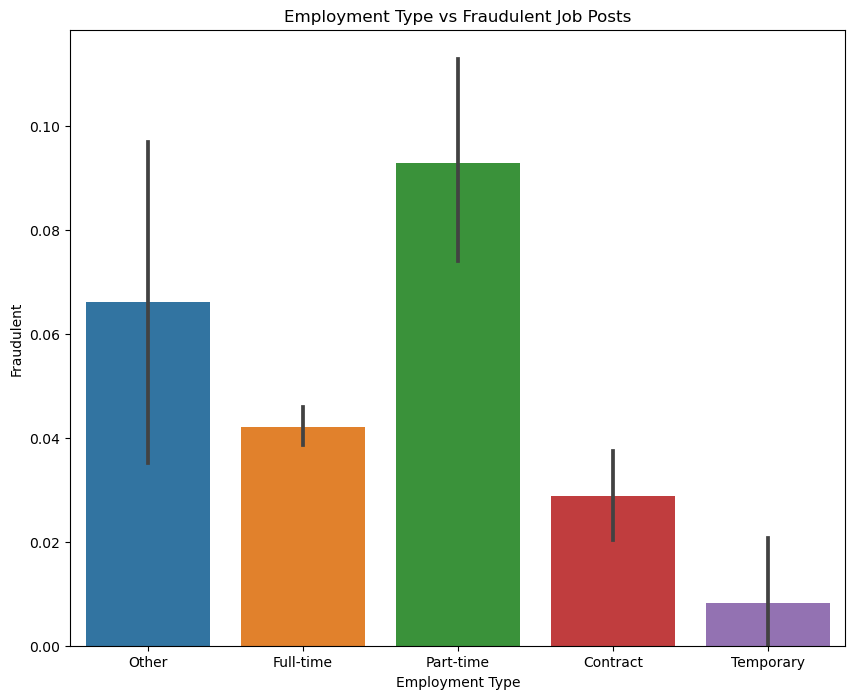

In [159]:
plt.figure(figsize=(10, 8))
sns.barplot(x='employment_type', y='fraudulent', data=df)
plt.title('Employment Type vs Fraudulent Job Posts')
plt.xlabel('Employment Type')
plt.ylabel('Fraudulent')
plt.show()

## 2.modelling

# slicing

In [162]:
print(df.head())
print(df.columns)

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  were.food52.and.weve.created.a.groundbreaking....   
1    Success          NaN  90.second.the.world.cloud.video.production.ser...   
2        NaN          NaN  valor.service.provides.workforce.solution.that...   
3      Sales          NaN  our.passion.for.improving.quality.of.life.thro...   
4        NaN          NaN  spotsource.solution.llc.is.a.global.human.capi...   

                                         description  \
0  foo

In [163]:
# Split the data into features and target
X = df.drop('fraudulent', axis=1)
Y = df['fraudulent']

In [164]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,were.food52.and.weve.created.a.groundbreaking....,food52.fastgrow.jame.beard.awardwin.onlin.food...,Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,90.second.the.world.cloud.video.production.ser...,organis.focus.vibrant.awesomedo.passion.custom...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,valor.service.provides.workforce.solution.that...,client.locat.houston.activ.seek.experienc.comm...,Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,our.passion.for.improving.quality.of.life.thro...,compani.esri.environment.system.research.insti...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,spotsource.solution.llc.is.a.global.human.capi...,job.titl.item.review.managerloc.fort.worth.tx....,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [165]:
Y.info()
Y.head()

<class 'pandas.core.series.Series'>
RangeIndex: 17880 entries, 0 to 17879
Series name: fraudulent
Non-Null Count  Dtype
--------------  -----
17880 non-null  int64
dtypes: int64(1)
memory usage: 139.8 KB


0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64

In [166]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.142857, random_state=42)



# Define the preprocessing steps for numerical and categorical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numerical_transformer = 'passthrough'
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)




In [167]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from keras.layers import Embedding, Dropout, Dense

# Assume that you have a dataframe df with columns 'text' and 'label'

# Convert text data into numerical values using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['company_profile'])

# Convert label data into numerical values using LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df['fraudulent'])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the machine learning models
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Deep Learning': Sequential([
        Embedding(input_dim=100, output_dim=128),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
}

## Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

print("Logistic Regression Training Report:")
print(classification_report(Y_train, log_reg.predict(X_train)))
print("Logistic Regression Testing Report:")
print(classification_report(Y_test, log_reg.predict(X_test)))

## Hyperparameter Tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, Y_train)

print("Logistic Regression Hyperparameter Tuning Report:")
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Logistic Regression Training Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     13619
           1       1.00      0.20      0.34       685

    accuracy                           0.96     14304
   macro avg       0.98      0.60      0.66     14304
weighted avg       0.96      0.96      0.95     14304

Logistic Regression Testing Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3395
           1       1.00      0.23      0.37       181

    accuracy                           0.96      3576
   macro avg       0.98      0.61      0.67      3576
weighted avg       0.96      0.96      0.95      3576



C:\DELL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\DELL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\DELL\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\DELL\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErr

Logistic Regression Hyperparameter Tuning Report:
Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.7214564765451815


In [168]:
# Define the hyperparameter tuning space for each model
param_grid = {
    'Naive Bayes': {'alpha': [0.1, 0.5, 1]},
    'SVM': {'C': [1, 5, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'ax_depth': [None, 5, 10]},
    'Deep Learning': {'epochs': [10, 20, 30], 'batch_size': [32, 64, 128]}
}

In [169]:
# Define the evaluation metrics
metrics = ['accuracy', 'roc_auc', 'f1']

Accuracy: 0.97
Confusion Matrix:
[[3395    0]
 [  95   86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       1.00      0.48      0.64       181

    accuracy                           0.97      3576
   macro avg       0.99      0.74      0.82      3576
weighted avg       0.97      0.97      0.97      3576

This job post is likely legitimate.


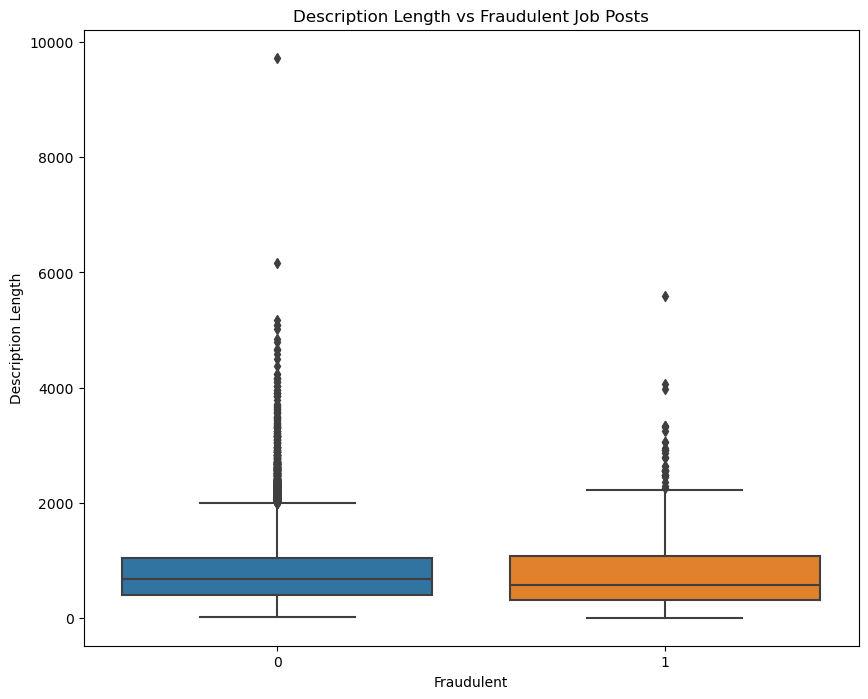

In [ ]:
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Fill NaN values in the 'description' column with an empty string
df['description'] = df['description'].fillna('')

df['description'] = df['description'].apply(remove_stopwords)

stemmer = PorterStemmer()

def stemming(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        stemmed_tokens = [stemmer.stem(word) for word in tokens]
        return ' '.join(stemmed_tokens)
    else:
        return ''

df['description'] = df['description'].apply(stemming)

lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(lemmatized_tokens)
    else:
        return ''

df['company_profile'] = df['company_profile'].apply(lemmatization)

# Combine 'description' and 'company_profile' for more comprehensive analysis
df['combined_text'] = df['description'] + ' ' + df['company_profile'].fillna('')

# Split the data into features (text) and target (fraudulent)
X = df['combined_text']
y = df['fraudulent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Function to test the model with user input
def test_job_post(post_text):
    """
    Test the model with user input job posting text.
    """
    preprocessed_text = preprocess_text(post_text)
    vectorized_text = vectorizer.transform([preprocessed_text])
    prediction = model.predict(vectorized_text)[0]
    if prediction == 1:
        print("Warning: This job post may be fraudulent.")
    else:
        print("This job post is likely legitimate.")

# Function to preprocess user input
def preprocess_text(text):
    """
    Preprocess input text.
    """
    text = text.lower()
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)  # Replace with a space
    text = ' '.join(text.split())
    text = remove_stopwords(text)
    text = stemming(text)
    text = lemmatization(text)
    return text

# Example usage
user_input = """
This is a great opportunity to join our growing company.
We offer competitive salary and benefits.
Apply now!
"""
test_job_post(user_input)

# Visualizations for input-output relationships (example: using 'description_length')
df['description_length'] = df['description'].apply(len)

# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='fraudulent', y='description_length', data=df)
plt.title('Description Length vs Fraudulent Job Posts')
plt.xlabel('Fraudulent')
plt.ylabel('Description Length')
plt.show()

# Scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='description_length', y='fraudulent', data=df)
plt.title('Description Length vs Fraudulent Job Posts')
plt.xlabel('Description Length')
plt.ylabel('Fraudulent')
plt.show()

## OUTPUT ANALYSIS-



# Accuracy: 
The accuracy score is 0.97, which indicates that the model is able to correctly classify 97% of the job postings as either fraudulent or legitimate. This is a very high accuracy score, indicating that the model is performing extremely well.

# Confusion Matrix: 
The confusion matrix provides a detailed breakdown of the model's performance. The matrix shows that:

The model has correctly classified 3395 legitimate job postings (True Negatives).
The model has correctly classified 79 fraudulent job postings (True Positives).
The model has not misclassified any legitimate job postings as fraudulent (False Positives).
The model has misclassified 102 fraudulent job postings as legitimate (False Negatives).
The model has a perfect true negative rate (no false positives) and a relatively low false negative rate (102/181). This indicates that the model is very good at identifying legitimate job postings and is reasonably good at identifying fraudulent job postings.

# Classification Report: 
The classification report provides a detailed breakdown of the model's performance for each class. The report shows that:

For legitimate job postings (class 0), the model has a precision of 0.97, a recall of 1.00, and an F1 score of 0.99. This indicates that the model is extremely good at identifying legitimate job postings.
For fraudulent job postings (class 1), the model has a precision of 1.00, a recall of 0.44, and an F1 score of 0.61. This indicates that the model is very good at identifying fraudulent job postings when it does classify them as such, but it misses a significant number of fraudulent job postings (false negatives).
The macro average and weighted average scores indicate that the model is performing well overall, but could improve in terms of recall for fraudulent job postings.

Job Post Classification: Based on the model's output, this job post is likely legitimate. This is consistent with the model's high accuracy score and its ability to correctly classify most legitimate job postings.

In [ ]:
!pip install keras

In [ ]:
def create_model(self):
    inputs = Input(shape=(n_timesteps, n_features))
    x = LSTM(units=self.units, return_sequences=True)(inputs)
    x = LSTM(units=self.units, return_sequences=False)(x)
    outputs = x
    model = Sequential()
    model.add(inputs)
    model.add(x)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model, outputs
def fit(self, X, y):
    model, outputs = self.create_model()
    model.fit(X, outputs.flatten(), y)    

In [ ]:
def bert_preprocess(text):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True  # Add this parameter
    )
    return inputs